# regresión lineal: ordinary least squares

## cargando librerias

In [24]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [25]:
import sklearn
sklearn.__version__

'1.3.0'

## Cargando el dataset

In [26]:
# Carga de datos.
datos = datasets.fetch_california_housing()
# datos = datasets.fetch_california_housing
# print(datos)
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
# print(y)

Dimensiones de X:  (20640, 8)


## Métricas de evaluación:

- RMSE
- MAE
- MAPE
- R2: es el score por defecto del algoritmo de regresión lineal OLS

In [27]:
# # Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

## Separar los datos: train and test

In [28]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(y_training))
print(X_testing.shape)
print(y_testing.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


## Escalando los datos

In [29]:
# 2) Extracción de características
# 3) Selección de atributos
# 4) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()       # create
standardizer.fit(X_training)                        # fit
X_stdr = standardizer.transform(X_training)         # transform

## Construcción del algorimto de aprendizaje

In [30]:
# 5) Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression(fit_intercept=True) # esto es para que asigne un valor a bias 

### Validación cruzada interna

A la funcion cross validate se le pasa el modelo (no entrenado) los datos de entrenamiento X e y, y los datos para cross validation(cuantos k folds queremos, mezcla= True o False, random_state, scoring= el diccionario de metricas que hemos creado anteriormente) si no le indicamos las métricas en el argumento de **scoring** autmaticamente solo obtendrá el R2.

La función devuelve un diccionario con las llaves (keys) como nombre de la métrica y los valores (values) un np.array con el tamaño de k folds con la puntuación obtenida en cada fold. podemos calcular la media y la std facilmente.

In [31]:
# 5.1) Validación cruzada interna

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(estimator=reg,                                              # el modelo
                                   X= X_stdr,                                                  # las features escaladas
                                   y= y_training,                                              # las respuestas
                                   cv = KFold(n_splits=5, shuffle=True, random_state=42),      # los parametros del cross validation
                                   scoring=metricas)                                           # que scores o métricas queremos que guarde

#print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
print(type(cross_val_results))
print(cross_val_results.keys())
# print('\n')
# print(cross_val_results)

<class 'dict'>
dict_keys(['fit_time', 'score_time', 'test_MAE', 'test_RMSE', 'test_MAPE', 'test_R2'])


In [32]:
for metrica, resultados in cross_val_results.items():
    print('Para la métrica: \t{} \t se han obtenido de media los siguientes resultados \t ---> \t{}'.format(metrica, round(resultados.mean(), 4)))

Para la métrica: 	fit_time 	 se han obtenido de media los siguientes resultados 	 ---> 	0.006
Para la métrica: 	score_time 	 se han obtenido de media los siguientes resultados 	 ---> 	0.0022
Para la métrica: 	test_MAE 	 se han obtenido de media los siguientes resultados 	 ---> 	-0.5291
Para la métrica: 	test_RMSE 	 se han obtenido de media los siguientes resultados 	 ---> 	-0.7205
Para la métrica: 	test_MAPE 	 se han obtenido de media los siguientes resultados 	 ---> 	-31.5346
Para la métrica: 	test_R2 	 se han obtenido de media los siguientes resultados 	 ---> 	0.6115


### Entrenamiento y obtención de parametros

In [33]:
# 5.2) Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]

Término independiente:  2.071946937378619


# PREDICCIÓN

## Extracción de las características de test

En este caso no hace falta

## Selección de los atributos de test 

En este dataset los atributos ya vienen seleccionados

## Estandarización de las característiacs de test

Siempre se debe transformar los datos de test con los transformadores entrenados con el conjunto de features de entrenamiento.

In [34]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 
# 8) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

## Predicciones del modelo con el conjunto de test

se obtienen y_pred

In [35]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [36]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_testing, y_pred_test)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  0.5332
MSE: 0.5559
RMSE: 0.7456
MAPE: 0.3195
R2:   0.5758


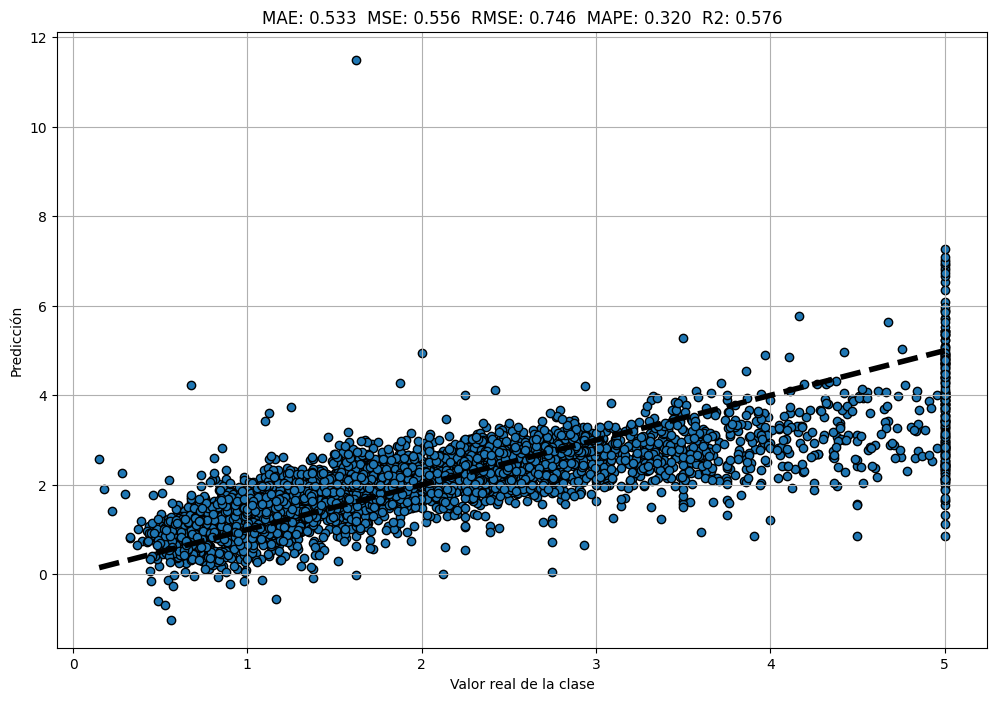

In [37]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.scatter(y_testing, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
          (MAE,MSE,RMSE,MAPE,R2))
plt.grid()
plt.show()